In [8]:
# DISPLAYING TABLE (CSV)
import os
import numpy as np
import pandas as pd

path = "./data/"

filename_read = os.path.join(path,"LaqnData.csv")
df = pd.read_csv(filename_read, na_values=['NA','?'])

# use inplace=False
df

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,HI0,CO,01/01/2018 00:00,NaN,mg m-3,P
1,HI0,CO,01/01/2018 00:15,NaN,mg m-3,P
2,HI0,CO,01/01/2018 00:30,NaN,mg m-3,P
3,HI0,CO,01/01/2018 00:45,NaN,mg m-3,P
4,HI0,CO,01/01/2018 01:00,NaN,mg m-3,P
...,...,...,...,...,...,...
175195,HI0,O3,31/12/2018 22:45,57.0,ug m-3,R
175196,HI0,O3,31/12/2018 23:00,61.1,ug m-3,R
175197,HI0,O3,31/12/2018 23:15,61.1,ug m-3,R
175198,HI0,O3,31/12/2018 23:30,61.1,ug m-3,R


In [9]:
# MISSING INPUTS ?

import numpy as np

df = df.replace('', np.NaN)

print('Number of instances = %d' % (df.shape[0]))
print('Number of attributes = %d' % (df.shape[1]))

print('Number of missing values:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

Number of instances = 175200
Number of attributes = 6
Number of missing values:
	Site: 0
	Species: 0
	ReadingDateTime: 0
	Value: 43476
	Units: 0
	Provisional or Ratified: 0


In [10]:
# Replacing all the empty values to be 'NaN'
data2 = df['Value']

print('Before replacing missing values:')
print(data2)
data2 = data2.fillna("NaN")

print('\nAfter replacing missing values:')
print(data2)

Before replacing missing values:
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
175195    57.0
175196    61.1
175197    61.1
175198    61.1
175199    61.1
Name: Value, Length: 175200, dtype: float64

After replacing missing values:
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
175195    57.0
175196    61.1
175197    61.1
175198    61.1
175199    61.1
Name: Value, Length: 175200, dtype: object


In [11]:
# Showing the new amount of rows left after discarding the empty values
print('Number of rows in original data = %d' % (df.shape[0]))

data2 = df.dropna()
print('Number of rows after discarding missing values = %d' % (data2.shape[0]))

Number of rows in original data = 175200
Number of rows after discarding missing values = 131724


<Axes: >

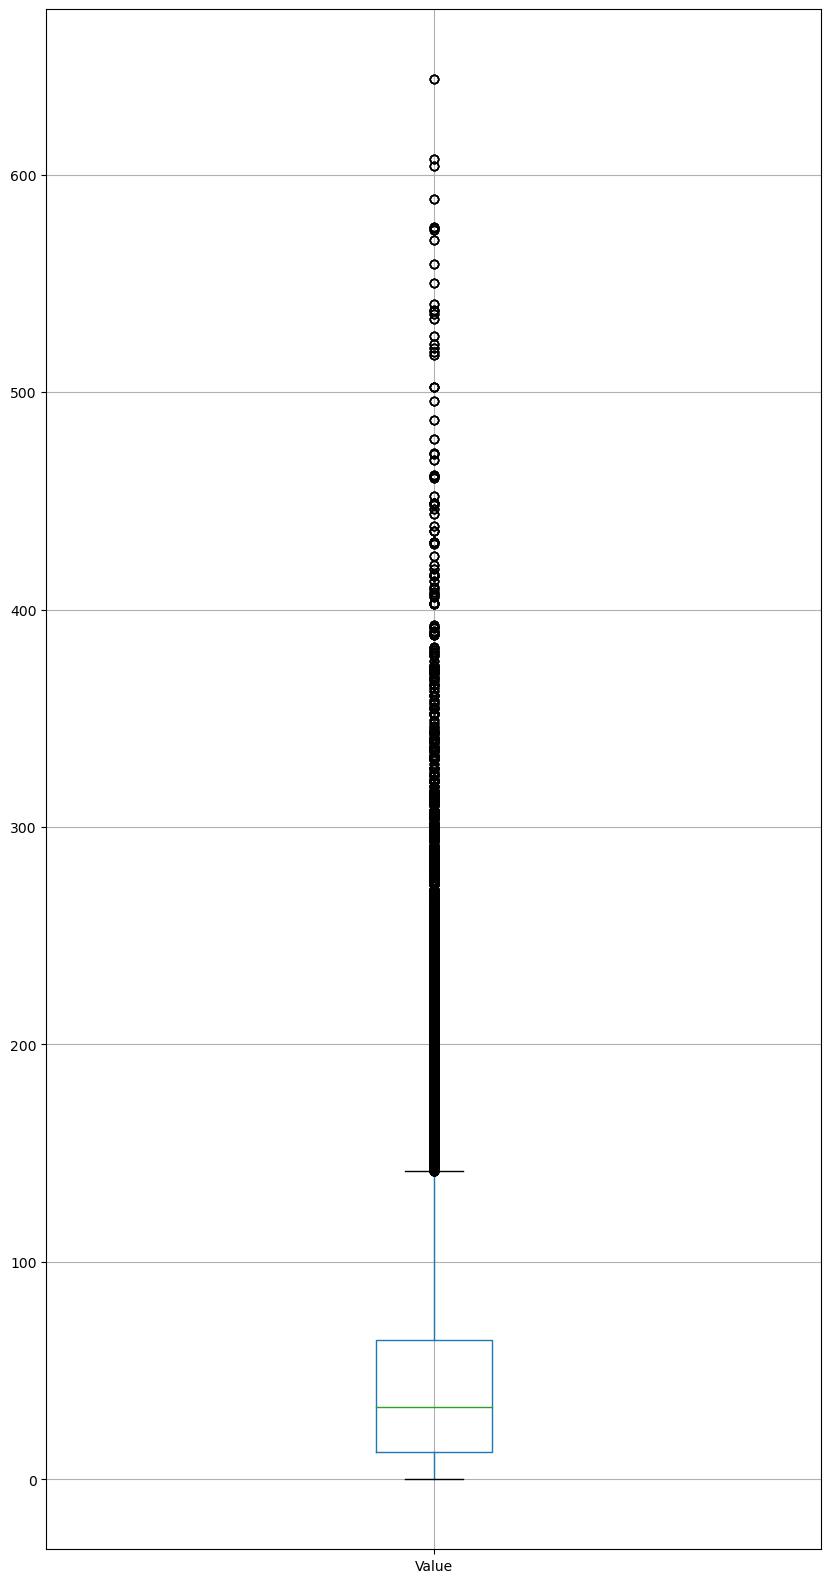

In [12]:
%matplotlib inline

data2 = df.drop(['Site', 'Species', 'Units', 'Provisional or Ratified'],axis=1)
data2['Value'] = pd.to_numeric(data2['Value'])
data2.boxplot(figsize=(10,20))

In [13]:
# SORTING BY DATE/TIME
df = df.sort_values(by='ReadingDateTime',ascending=True)
df

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,HI0,CO,01/01/2018 00:00,NaN,mg m-3,P
105120,HI0,NOX,01/01/2018 00:00,26.2,ug m-3 as NO2,R
35040,HI0,NO,01/01/2018 00:00,7.1,ug m-3,R
70080,HI0,NO2,01/01/2018 00:00,15.3,ug m-3,R
140160,HI0,O3,01/01/2018 00:00,56.7,ug m-3,R
...,...,...,...,...,...,...
70079,HI0,NO,31/12/2018 23:45,NaN,ug m-3,R
35039,HI0,CO,31/12/2018 23:45,NaN,mg m-3,P
105119,HI0,NO2,31/12/2018 23:45,NaN,ug m-3,R
140159,HI0,NOX,31/12/2018 23:45,NaN,ug m-3 as NO2,R


In [14]:
Z = (data2-data2.mean())/data2.std()
Z

C:\Users\sho85\AppData\Local\Temp\ipykernel_21604\3143169472.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Z = (data2-data2.mean())/data2.std()
C:\Users\sho85\AppData\Local\Temp\ipykernel_21604\3143169472.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Z = (data2-data2.mean())/data2.std()


,ReadingDateTime,Value
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
175195,NaN,0.164961
175196,NaN,0.240534
175197,NaN,0.240534
175198,NaN,0.240534


In [15]:
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))
Z2 = Z.loc[((Z > -3).sum(axis=1)==1) & ((Z <= 3).sum(axis=1)==1)]
print('Number of rows after discarding missing values = %d' % (Z2.shape[0]))

Number of rows before discarding outliers = 175200
Number of rows after discarding missing values = 128924


In [16]:
#DUPLICATE DATA SET USING THE DRINKS.CSV SET
path = "./data/"

filename_read = os.path.join(path,"drinks.csv")
df2 = pd.read_csv(filename_read, na_values=['NA','?'])

dups = df2.loc[:, df2.columns != 'country'].duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df2.loc[[0,13]]

Number of duplicate rows = 10


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
13,Bangladesh,0,0,0,0.0,Asia


In [17]:
print('Number of rows before discarding duplicates = %d' % (df2.shape[0]))
data2 = df2.loc[:, df2.columns != 'country'].drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data2.shape[0]))

Number of rows before discarding duplicates = 193
Number of rows after discarding duplicates = 183


In [18]:
#SHUFFLING DATAFRAME

#np.random.seed(30) # Uncomment this line to get the same shuffle each time

df = df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True)
# use inplace=False
df

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,HI0,NO2,23/04/2018 04:00,86.4,ug m-3,R
1,HI0,NO2,03/10/2018 21:30,63.6,ug m-3,R
2,HI0,NO,24/10/2018 01:00,NaN,ug m-3,R
3,HI0,NO2,04/11/2018 09:15,83.6,ug m-3,R
4,HI0,NOX,29/03/2018 09:15,158.3,ug m-3 as NO2,R
...,...,...,...,...,...,...
175195,HI0,NO2,25/08/2018 07:45,16.3,ug m-3,R
175196,HI0,NO,20/09/2018 08:30,39.9,ug m-3,R
175197,HI0,O3,28/09/2018 20:15,NaN,ug m-3,R
175198,HI0,O3,17/04/2018 00:00,59.7,ug m-3,R


In [19]:
df = df.sort_values(by='Species',ascending=True)
df

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
175199,HI0,CO,29/10/2018 01:00,NaN,mg m-3,P
68874,HI0,CO,18/08/2018 17:45,NaN,mg m-3,P
106533,HI0,CO,27/01/2018 16:30,NaN,mg m-3,P
132658,HI0,CO,12/10/2018 22:15,NaN,mg m-3,P
106532,HI0,CO,13/10/2018 12:00,NaN,mg m-3,P
...,...,...,...,...,...,...
129541,HI0,O3,14/10/2018 00:15,36.3,ug m-3,R
45658,HI0,O3,12/01/2018 17:15,1.0,ug m-3,R
45645,HI0,O3,12/10/2018 02:45,44.1,ug m-3,R
129492,HI0,O3,26/04/2018 19:45,17.5,ug m-3,R


In [20]:
print("The first species is: {}".format(df['Species'].iloc[0]))

The first species is: CO


In [21]:
print("The first species is: {}".format(df['Species'].loc[0]))

The first species is: NO2


In [22]:
#SAVING A DATAFRAME
filename_read = os.path.join(path,"LaqnData.csv")
filename_write = os.path.join(path,"LaqnData-shuffle.csv")
df = pd.read_csv(filename_read,na_values=['NA','?'])
df = df.reindex(np.random.permutation(df.index))
df.to_csv(filename_write,index=False)   # Specify index = false to not write row numbers
print("Done")

Done


In [23]:
#DROPPING FIELDS
path = "./data/"

filename_read = os.path.join(path,"LaqnData.csv")
df = pd.read_csv(filename_read,na_values=['NA','?'])

print("Before drop: {}".format(df.columns))
df.drop('Site', axis=1, inplace=True)
print("After drop: {}".format(df.columns))
df[0:5]

Before drop: Index(['Site', 'Species', 'ReadingDateTime', 'Value', 'Units',
       'Provisional or Ratified'],
      dtype='object')
After drop: Index(['Species', 'ReadingDateTime', 'Value', 'Units',
       'Provisional or Ratified'],
      dtype='object')


,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CO,01/01/2018 00:00,NaN,mg m-3,P
1,CO,01/01/2018 00:15,NaN,mg m-3,P
2,CO,01/01/2018 00:30,NaN,mg m-3,P
3,CO,01/01/2018 00:45,NaN,mg m-3,P
4,CO,01/01/2018 01:00,NaN,mg m-3,P


In [24]:
#CALCULATED FIELDS USING DRINKS.csv
filename_read = os.path.join(path,"drinks.csv")
df2 = pd.read_csv(filename_read,na_values=['NA','?'])
df2.insert(1,'Total Servings',(df2['beer_servings']+df2['spirit_servings']+df2['wine_servings']).astype(int))
df2
#print(df2)

,country,Total Servings,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0,0.0,Asia
1,Albania,275,89,132,54,4.9,Europe
2,Algeria,39,25,0,14,0.7,Africa
3,Andorra,695,245,138,312,12.4,Europe
4,Angola,319,217,57,45,5.9,Africa
...,...,...,...,...,...,...,...
188,Venezuela,436,333,100,3,7.7,South America
189,Vietnam,114,111,2,1,2.0,Asia
190,Yemen,6,6,0,0,0.1,Asia
191,Zambia,55,32,19,4,2.5,Africa


In [25]:
#FEATURE NORMALIZATION
import os
import pandas as pd
import numpy as np
from scipy.stats import zscore

filename_read = os.path.join(path,"drinks.csv")
df2 = pd.read_csv(filename_read,na_values=['NA','?'])
df2['total_litres_of_pure_alcohol'] = zscore(df2['total_litres_of_pure_alcohol'])
df2

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,-1.253377,Asia
1,Albania,89,132,54,0.048599,Europe
2,Algeria,25,0,14,-1.067381,Africa
3,Andorra,245,138,312,2.041419,Europe
4,Angola,217,57,45,0.314308,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,0.792585,South America
189,Vietnam,111,2,1,-0.721959,Asia
190,Yemen,6,0,0,-1.226806,Asia
191,Zambia,32,19,4,-0.589104,Africa


In [26]:
#MISSING VALUES
import os
import pandas as pd
import numpy as np
from scipy.stats import zscore

path = "./data/"

filename_read = os.path.join(path,"LaqnData.csv")
df = pd.read_csv(filename_read,na_values=['NA','?'])
med = df['Value'].median()
df['Value'] = df['Value'].fillna(med)
# df = df.dropna() # you can also simply drop NA values